### Imports

In [26]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path analysis

The second notebook analyzes the paths converted in the first notebook. The main goal is to answer the following questions:

Does the sentiment of the starting article influence the trajectory of the game path?
For instance, if a player begins with an article with a negative tone, are they more likely to navigate through similarly negatively toned articles?

## Data Loading and rearrangement

The first step is to choose which path analysis method we are going to use.
For this question, the first method (the one considering only the direct paths).

!! Not sure about this decision, what do you think ? !!

In [27]:
with open('df_paths1.pickle', 'rb') as file:
    df_paths = pickle.load(file)

df_paths.head()

,Scores,Rounded,Target score
0,"[-0.14721301536458237, -0.028293290087380706, ...","[0, 0, 0, 0, 0, 0, 0, -1, -1]",NaN
1,"[-0.14721301536458237, -0.048477304979667915, ...","[0, 0, 0, -1, -1]",NaN
2,"[-0.14721301536458237, -0.052448976123087784, ...","[0, 0, -1, 0, -1, 0, -1, -1]",NaN
3,"[-0.14721301536458237, 0.037461097698424525, -...","[0, 0, 0, 0]",NaN
4,"[-0.14721301536458237, -0.06396592637112342, 0...","[0, 0, 0, -1, 0, 0, 0]",NaN


The length of each path is calculated and stored in the dataframe.
The paths that have a length of 1 are unfinished paths that do not countain any useful information for this analysis, they are therefore discarded

In [28]:
for i in range(len(df_paths)):
    df_paths.loc[i,'Length']=len(df_paths.loc[i,'Scores'])

df_paths['Length']=df_paths['Length'].astype(int)

df_paths=df_paths[df_paths['Length']!=1].copy(deep=True)
df_paths.reset_index(inplace=True,drop=True)

print(f'There is {len(df_paths)} paths')
df_paths.head()

There is 70280 paths


,Scores,Rounded,Target score,Length
0,"[-0.14721301536458237, -0.028293290087380706, ...","[0, 0, 0, 0, 0, 0, 0, -1, -1]",NaN,9
1,"[-0.14721301536458237, -0.048477304979667915, ...","[0, 0, 0, -1, -1]",NaN,5
2,"[-0.14721301536458237, -0.052448976123087784, ...","[0, 0, -1, 0, -1, 0, -1, -1]",NaN,8
3,"[-0.14721301536458237, 0.037461097698424525, -...","[0, 0, 0, 0]",NaN,4
4,"[-0.14721301536458237, -0.06396592637112342, 0...","[0, 0, 0, -1, 0, 0, 0]",NaN,7


Add a few more statistics to the dataframe.

In [29]:
# Add the starting article score
for i in range(len(df_paths)):
    df_paths.loc[i,'Starting']=df_paths.loc[i,'Rounded'][0]

df_paths['Starting']=df_paths['Starting'].astype(int)

print('1st done')


# Add the number of positive/neutral/negative articles
for i in range(len(df_paths)):
    list2=df_paths.loc[i,'Rounded']
    df_paths.loc[i,'Pos Nbr']=list2.count(1)
    df_paths.loc[i,'Neutral Nbr']=list2.count(0)
    df_paths.loc[i,'Neg Nbr']=list2.count(-1)

df_paths['Pos Nbr']=df_paths['Pos Nbr'].astype(int)
df_paths['Neutral Nbr']=df_paths['Neutral Nbr'].astype(int)
df_paths['Neg Nbr']=df_paths['Neg Nbr'].astype(int)

print('2nd done')


# Add the positive/neutral/negative percentage of articles
df_paths['Pos %']=round(df_paths['Pos Nbr']/df_paths['Length'],2)
df_paths['Neg %']=round(df_paths['Neg Nbr']/df_paths['Length'],2)
df_paths['Neutral %']=round(df_paths['Neutral Nbr']/df_paths['Length'],2)

print('3rd done')

df_paths.head()

1st done
2nd done
3rd done


,Scores,Rounded,Target score,Length,Starting,Pos Nbr,Neutral Nbr,Neg Nbr,Pos %,Neg %,Neutral %
0,"[-0.14721301536458237, -0.028293290087380706, ...","[0, 0, 0, 0, 0, 0, 0, -1, -1]",NaN,9,0,0,7,2,0.0,0.22,0.78
1,"[-0.14721301536458237, -0.048477304979667915, ...","[0, 0, 0, -1, -1]",NaN,5,0,0,3,2,0.0,0.40,0.60
2,"[-0.14721301536458237, -0.052448976123087784, ...","[0, 0, -1, 0, -1, 0, -1, -1]",NaN,8,0,0,4,4,0.0,0.50,0.50
3,"[-0.14721301536458237, 0.037461097698424525, -...","[0, 0, 0, 0]",NaN,4,0,0,4,0,0.0,0.00,1.00
4,"[-0.14721301536458237, -0.06396592637112342, 0...","[0, 0, 0, -1, 0, 0, 0]",NaN,7,0,0,6,1,0.0,0.14,0.86


## Data visualisation and analysis

Let's visualize the data and start to answer the question, starting by:
- Does the starting article score influence the following articles scores ?  
To achieve this, we will first look at the positive case  
(For a positive starting article, is it more likely to get positive articles in the corresponding path ?).

Text(0, 0.5, 'Positive start')

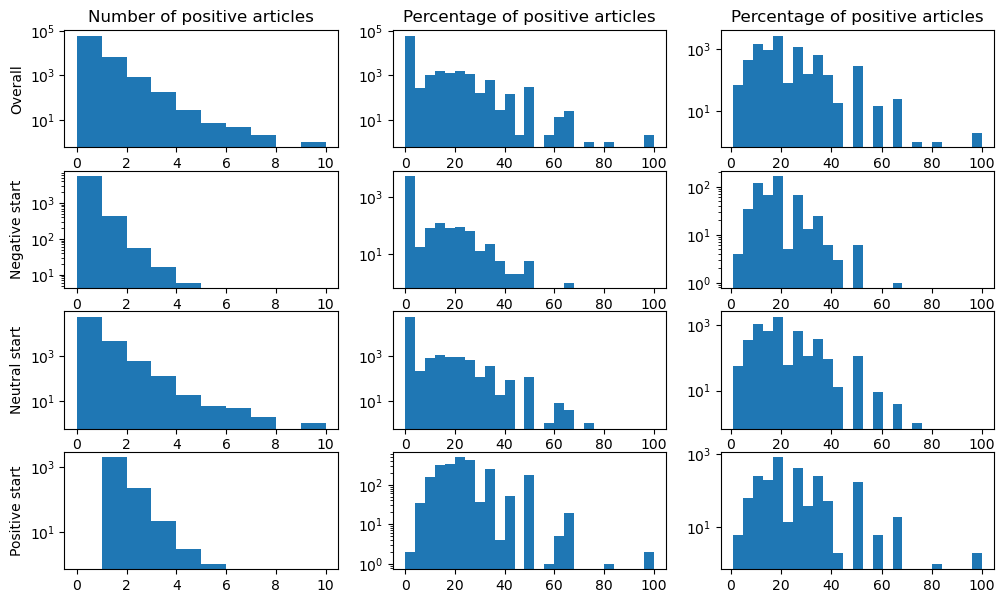

In [30]:
arrs=[]

for col in ['Pos Nbr','Pos %']:
    arrs.append(df_paths[col].values)
    arrs.append(df_paths[df_paths['Starting']==-1][col].values)
    arrs.append(df_paths[df_paths['Starting']==0][col].values)
    arrs.append(df_paths[df_paths['Starting']==1][col].values)

fig,axs=plt.subplots(4,3,figsize=(12,7))

for i in range(4):
    axs[i,0].hist(arrs[i],bins=10,range=(0,10))
    axs[i,0].set_yscale('log')

    axs[i,1].hist(100*arrs[4+i],bins=25,range=(0,100))
    axs[i,1].set_yscale('log')

    axs[i,2].hist(100*arrs[4+i],bins=25,range=(1,100))
    axs[i,2].set_yscale('log')

axs[0,0].set_title('Number of positive articles')
axs[0,1].set_title('Percentage of positive articles')
axs[0,2].set_title('Percentage of positive articles')

axs[0,0].set_ylabel('Overall')
axs[1,0].set_ylabel('Negative start')
axs[2,0].set_ylabel('Neutral start')
axs[3,0].set_ylabel('Positive start')

##### First column

By looking at the number of positive articles, it seems like the path starting with neutral articles have more positive articles. However, we remember that there is way more neutral starting path than positive or negative starting ones. Therefore, it makes sense that they are also more long paths, which can have several positive articles, without the path being positive overall.  
To avoid this misleading, we look at the path percentage rather than the absolute number of positive articles.

##### Second column (all paths)

At first glance, it seems like the positive starting paths have a higher distribution of positive articles. However, we need to consider the fact that the positive starting paths have at least one positive article, whereas the other don't necessarily. To account for this, the path with zero positive articles are removed.

##### Third column (only paths with at least one positive articles)

The distributions seem to be the same (slightly shifted to the right for positive starting path, but not significant). This means that when we look at the positive starting paths, we are actually just cutting out the paths that have no positive articles, and it doesn't affect the positive distribution (the chance of having more positive articles).

---------
Now, to answer the question  
Is it more likely to get a positive article in the path if the starting article is positive rather than if it is neutral or negative ?  

The first assumption (stemming from the previous graphs) is that it doesn't. To see this more rigorously, we look at the positive percentage of the positive starting paths but excluding the first (positive) article, and compare this to the neutral/negative starting article.

In [34]:
df_paths.loc[df_paths['Starting']==1,'Pos % 2']=round((df_paths['Pos Nbr']-1)/(df_paths['Length']-1),2)

df_paths.head()

,Scores,Rounded,Target score,Length,Starting,Pos Nbr,Neutral Nbr,Neg Nbr,Pos %,Neg %,Neutral %,Pos % 2
0,"[-0.14721301536458237, -0.028293290087380706, ...","[0, 0, 0, 0, 0, 0, 0, -1, -1]",NaN,9,0,0,7,2,0.0,0.22,0.78,NaN
1,"[-0.14721301536458237, -0.048477304979667915, ...","[0, 0, 0, -1, -1]",NaN,5,0,0,3,2,0.0,0.40,0.60,NaN
2,"[-0.14721301536458237, -0.052448976123087784, ...","[0, 0, -1, 0, -1, 0, -1, -1]",NaN,8,0,0,4,4,0.0,0.50,0.50,NaN
3,"[-0.14721301536458237, 0.037461097698424525, -...","[0, 0, 0, 0]",NaN,4,0,0,4,0,0.0,0.00,1.00,NaN
4,"[-0.14721301536458237, -0.06396592637112342, 0...","[0, 0, 0, -1, 0, 0, 0]",NaN,7,0,0,6,1,0.0,0.14,0.86,NaN


Text(0, 0.5, 'Positive start')

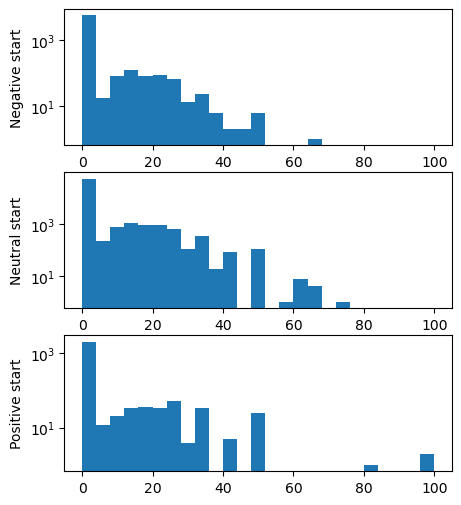

In [38]:
arrs=[]

arrs.append(df_paths[df_paths['Starting']==-1]['Pos %'].values)
arrs.append(df_paths[df_paths['Starting']==0]['Pos %'].values)
arrs.append(df_paths[df_paths['Starting']==1]['Pos % 2'].values)

fig,axs=plt.subplots(3,1,figsize=(5,6))

for i in range(3):
    axs[i].hist(100*arrs[i],bins=25,range=(0,100))
    axs[i].set_yscale('log')


axs[0].set_ylabel('Negative start')
axs[1].set_ylabel('Neutral start')
axs[2].set_ylabel('Positive start')

As expected, the distributions looks quite similar. To prove our hypothesis, some more rigorous statistic tests are required.

----------------------------

These plots compare the number and percentage of positive articles depending on the score of the starting article. We can see that if we get rid of the paths with 0 articles for neutral and negative starting articles (this makes sense, as the starting positive article would at least have 1 pos article, so we need to equilibrate) (another way to equilibrate would be to calculate the pos % without taking into account the first article ? to do next (1)).
Is a path with a starting positive article would have more positive articles in the path ? With these graphs, seems like no: the distributions seem to be the same (slightly shifted to the right it seems, but not much for pos). This means that when we look at the positive starting articles, we are actually just cutting out the paths that have no pos articles, and it doesnt affect the positive distribution (the chance of having more positive articles)
However, if we ask the question: The first article is positive, is it more likely to get a positive article in the path than if the first article was neutral or negative ?
The answer must be by doing (1) (I think), and then check with statistic tests

Can then check the same for negative, and for start pos -> neg, start neg -> pos, and also has at least one instead of start by